# <center>Probabilistyczne modele grafowe</center>
1. Prosty sposób wizualizacji struktury modelu probabilistycznego.
2. Wgląd we własności modelu - np. warunkowe niezależności, które możemy wyczytać patrząc na graf.
3. Złożone obliczenia, które normalnie musimy zrobić żeby przeprowadzić wnioskowanie czy uczenie modelu możemy wyrazić w postaci graficznych manipulacji, które niosą za sobą konkretne wyrażnia matematyczne.

Graf - zbiór wierzchołków połączonych krawędziami. 



W probabilistycznych modelach grafowych:
- wierzchołek -> zmienna losowa (lub grupa zmiennych losowych),
- krawędź -> relacja probabilistyczną pomiędzy wierzchołkami, które łączy,
- cały graf -> przedstawia sposób, w jaki łączny rozkład wszystkich zmiennych losowych można rozłożyć na iloczyn czynników, z których każdy zależy tylko od podzbioru zmiennych.

Wyróżniamy:
- Sieci Bayesowskie - skierowane modele grafowe,
- Losowe Pola Markowa - nieskierowane modele grafowe.

# <center>Sieci Bayesowskie</center>

Mamy trzy zmienne $a$, $b$, $c$ i prawdopodobieństwo łączne $P\left(a,b,c\right)$. Z definicji prawdopodobieństwa warunkowego wynika, że rozkład łączny możemy zaprezentować jako
$$P\left(a,b,c\right) = P\left(c|a,b\right) P\left(b|a\right) P\left(a\right).$$
Reprezentacja prawej części równania na grafie:
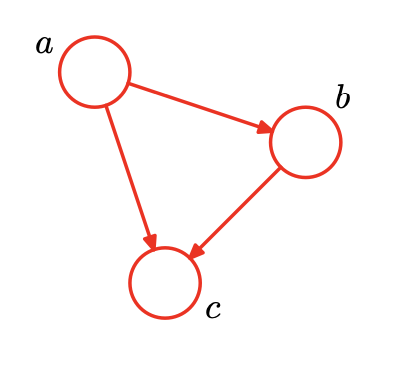

Każdy z wierzchołków $a$, $b$, $c$ ma przypisane odpowiednie prawdopodobieństwo warunkowe. Dla każdego prawodopodobieństwa warunkowego tworzymy skierowane krawędzie: od wierzchołków, które są w warunku do wierzchołka, którego prawdopodobieństwo dotyczy. 

W ogólności dla K zmiennych mamy

$$P\left(x_1,\ldots,k_K\right) = P\left(x_K | x_1,\ldots,x_{K-1}\right) \ldots P\left(x_2|x_1\right) P\left(x_1\right)$$
Tutaj też możemy stworzyć graf z K wierzchołkami według powyższej reguły. Jest to graf pełny. Ciekawsze rzeczy przyjdą jak nie będzie pełny.

Biorąc bardziej skomplikowany przykład:
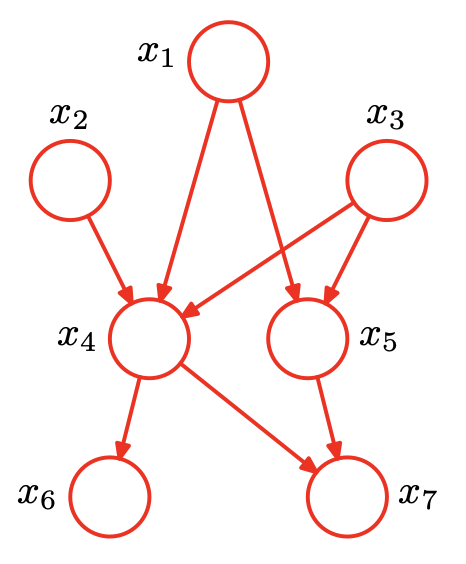
mamy
$$P\left(x_2,x_2,x_3,x_4,x_5,x_6,x_7\right) =P\left(x_1\right) P\left(x_2\right) P\left(x_3\right) P\left(x_4|x_1,x_2,x_3\right) P\left(x_5|x_1, x_3\right) P\left(x_6|x_4\right) P\left(x_7|x_4,x_5\right)$$

Zatem w ogólności mamy
$$P\left(\textbf{x}\right) = \Pi_{k=1} ^{K} P\left(x_k | pa_k\right),$$
gdzie $pa_k$ - rodzice wierzchołka $x_k$.

- Tutaj rozważaliśmy jeden wierzchołek - jedna zmienna, ale możemy też każdemu wierzchołkowi przypisywać np. wektor zmiennych.
- Grafy, które rozważamy podlegają ograniczeniu. Nie mogą w nich istnieć żadne skierowane cykle, czyli zamknięte ścieżki takie, że podążając od wierzchołka do wierzchołka wzdłóż kierunku krawędzi powrócimy do wierzchołka startowego. Takie grafy noszą nazwę DAG (directed acyclic graphs - skierowany graf acykliczny). 

# <center> Model regresji wielomianowej - podejście częstościowe, a Bayesowskie</center>

- Częstościowe

Mamy
$$y = w_0 + w_1 x + w_2 x^{2} + \ldots + w_n x^{n} \rightarrow \vec{y} = X \vec{w} + \vec{\epsilon}$$
a więc 
$$\hat{\vec{w}} = \left(X^{T} X\right)^{-1} \vec{y}$$
oraz 
$$\hat{y} = \hat{w} x.$$

1. Idea: $\text{max}_{w} P\left(x,y | w\right)$ - maksymalizujemy likelihood, czyli prawdopodobirństwo danych pod warunkiem parametru modelu.
2. Parametry mofrlu estymujemy poprzez likelihood.
3. Mniej ogólne podejście.
4. Likelihood mówi nam przy jakim parametrze $w$ te dane są prawdopodobne.
5. $P\left(y|x\right)$

- Bayesowskie
1. Zakładamy, że $w$ jest z jakiegoś rozkładu, a więc jest nieznane.
2. Bazujemy na twierdzeniu Bayesa:
$$P\left(A|B\right) = \frac{P\left(A,B\right)}{P\left(B\right)} = \frac{P\left(B|A\right) P\left(A\right)}{P\left(B\right)} \sim P\left(B|A\right) P\left(A\right),$$
gdzie $P\left(A|B\right)$ - a posteriori, $P\left(B|A\right)$ - likelihood, $P\left(A\right)$ - a priori, $P\left(B\right)$ - data.
3. Idea: maksymalizujemy a posteriori $P\left(w|x,y\right)$, które jest postaci 
$$P\left(w|x,y\right) = \frac{P\left(w,x,y\right)}{P\left(x,y\right)} = \frac{P\left(x.y|w\right) P\left(w\right)}{P\left(x,y\right)} \sim P\left(x,y|w\right) P\left(w\right),$$
gdzie $P\left(x.y|w\right)$ - likelihood, $P\left(w\right)$ - prior, $P\left(x,y\right)$ - data.
4. Predictive posterior $P\left(y|x,w\right)$

Podsumowując oba podejścia:
- Częstościowe -> przy jakich $w$ te dane są najbardziej prawopodobne,
- Bayesowskie -> jakie rzeczywiście te $w$ są (najbardziej prawopodobne).

# <center> Przykład użycia - Bayesowski model regresji wielomianowej </center>
Prawdopodobieństwo łączne zapiszemy jako
$$P\left(y,w\right) = P\left(w\right) \Pi_{n=1}^{N} P\left(y_n|w\right),$$
gdzie $P\left(w\right)$ - prior.
Biorąc konkretne parametry modelu zapiszemy
$$P\left(y,w|x,\alpha,\sigma^{2}\right) = P\left(w|\alpha\right) \Pi_{i=1}^{N} P\left(y_i | w,x_i,\sigma^{2}\right),$$
gdzie $y_i \sim N\left(\mu_i,\sigma^{2}\right)$ oraz $\alpha$ - parametr rozkładu normalnego, z którego pochodzi $w$ - $w \sim N\left(0, \alpha^{-1} I\right)$. 

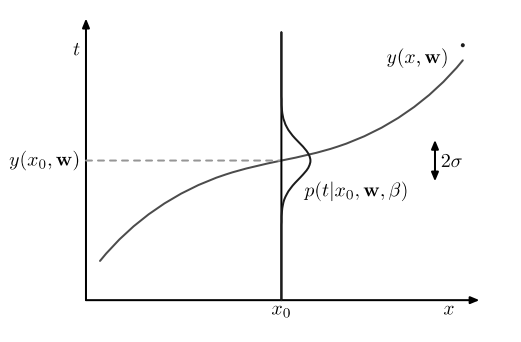


Powyżej schemat warunkowego rozkładu gaussowskiego dla danego $y$ pod warunkeim $x$. Średnia $\mu_i$ dana jest wielomianem $y(x, w)$, a precyzja dana jest parametrem $σ^2.$

Tworzymy modele grafowe musielibyśmy poświęcić bardzo dużo czasu na oznaczanie każdego jednego przykładu z danych $y_i$ jako osobny wierzchołek w grafie. W praktyce oznaczamy pojedynczy wierzchołek , obrysowujemy go i zaznaczamy, że oznacza on $N$ wierzchołków.
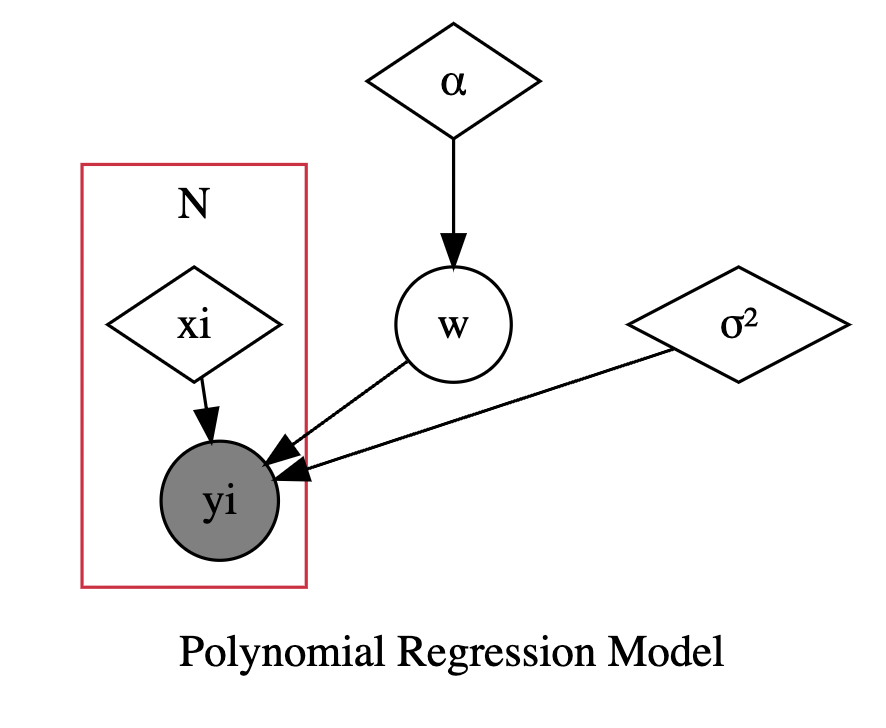

Tutaj diament oznacza parametr deterministryczny, szare koło zaobserwowane wartości.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Generujemy dane
np.random.seed(42)

N = 50
xs = np.linspace(-np.pi, np.pi, num=N)
ys = np.sin(xs) + np.random.normal(0, 0.1, size=N)

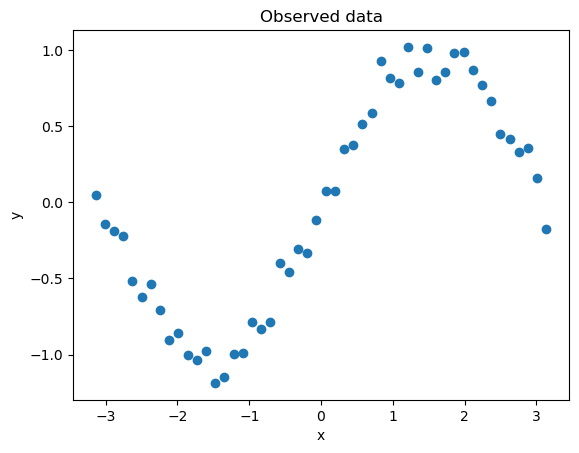

In [3]:
plt.scatter(xs, ys, marker='o')
plt.title('Observed data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [58]:
# Tworzymy  Bayesowski model regresji za pomocą PyMC3 - stałe parametry alpha, sigma

alpha = 0.1
sigma = 0.1

with pm.Model() as model:
    w = pm.Normal('w', mu=0, sigma=1/alpha, shape=4)
    mu = w[0] + w[1] * xs + w[2] * xs**2 + w[3] * xs**3
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=ys)
    
    # pm.sample - Perform MCMC (Markov chain Monte Carlo) sampling. 
    #             Draw samples from the posterior using the given step methods. 
    trace = pm.sample(10000, tune=1000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 153 seconds.


In [74]:
az.summary(trace, kind="stats") # średnia, odchylenie standardowe, przedział wiarygodności (HDI - highest density interval)

,mean,sd,hdi_3%,hdi_97%
w[0],-0.041,0.021,-0.081,-0.001
w[1],0.861,0.019,0.825,0.896
w[2],0.005,0.005,-0.003,0.014
w[3],-0.095,0.003,-0.100,-0.089


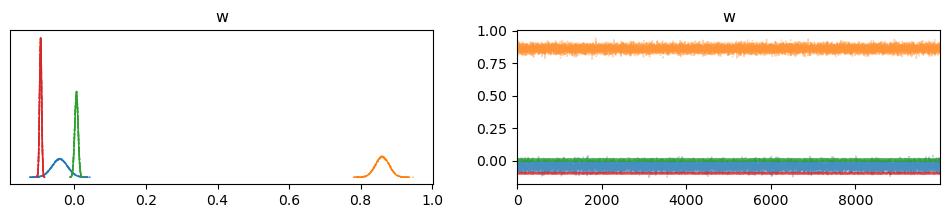

In [75]:
# Plot the posterior predictive distribution
# First plot: distributions of w3, w0, w2, w1 respectively
# Second plot: we can read the variance of each w; variance od w0 and w1 is greater than w2, w3
# Each line correponds to one chain in parallel computing, in our case - we have 4 chains
pm.plot_trace(trace, compact=True)
plt.show()

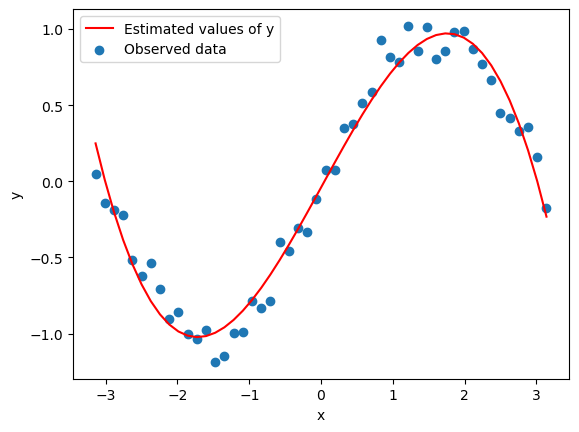

In [76]:
w0 = az.summary(trace, kind="stats")["mean"][0] # średnia z 40 000 wywołań (po 10 000 dla każdego łańcucha)
w1 = az.summary(trace, kind="stats")["mean"][1]
w2 = az.summary(trace, kind="stats")["mean"][2]
w3 = az.summary(trace, kind="stats")["mean"][3]

ys_ = w0 + w1*xs + w2*xs**2 + w3*xs**3

plt.plot(xs, ys_, color='red', label="Estimated values of y")
plt.scatter(xs, ys, marker='o', label='Observed data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

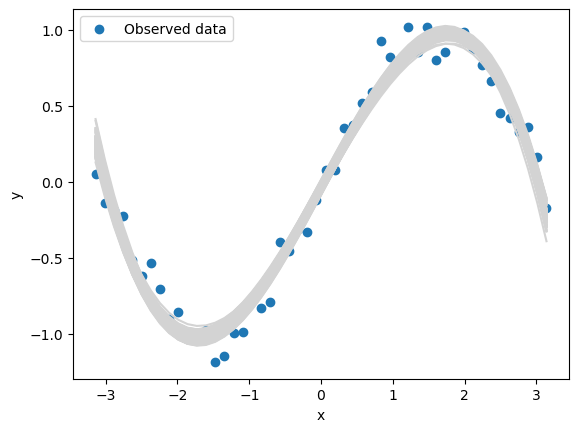

In [78]:
# Extract and plot 100 random individual posterior samples of w
w_samples = trace.posterior['w']

for i in range(100):
    w  = w_samples[np.random.randint(0, len(w_samples))] # choosing random chain
    w = w[np.random.randint(0, len(w))]                  # choosing random sample from the chain
    y = np.array([w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3 for x in xs])
    plt.plot(xs, y, color='lightgrey')

plt.scatter(xs, ys, marker='o', label='Observed data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [79]:
# Compute estimates for new values of y's based on posterior samples of w
w_hat = np.array(trace.posterior['w']).reshape(40000, 4)

def compute_mu(w, x):
    return w[:,0] + w[:,1] * x + w[:,2] * x**2 + w[:,3] * x**3

ys_hat = np.array([compute_mu(w_hat, x) for x in xs])

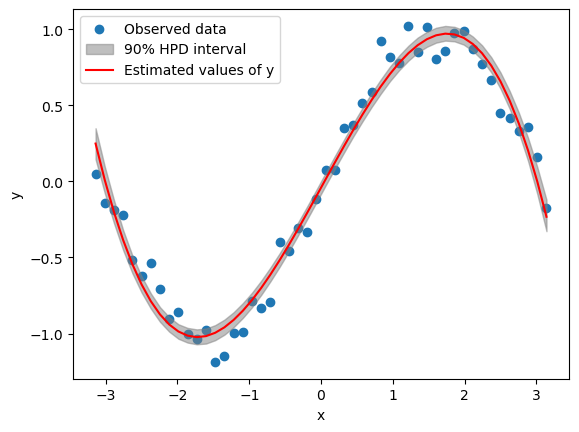

In [80]:
# Calculate HPD credible interval of 95%
ci_95 = az.hdi(np.transpose(ys_hat), hdi_prob=0.95)
lower_ys = ci_95[:,0]
upper_ys = ci_95[:,1]

plt.scatter(xs, ys, marker='o', label='Observed data')
plt.fill_between(xs, lower_ys, upper_ys, color='grey', alpha=0.5, label='90% HPD interval')
plt.plot(xs, ys_, color='red', label="Estimated values of y")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# Tworzymy  Bayesowski model regresji za pomocą PyMC3 - parametry alpha, sigma z wybranego rozkładu

with pm.Model() as model:
    alpha = pm.HalfNormal('alpha', sigma=0.1)
    sigma = pm.HalfNormal('sigma', sigma=10)
    w = pm.Normal('w', mu=0, sigma=1/alpha, shape=4)
    mu = w[0] + w[1] * xs + w[2] * xs**2 + w[3] * xs**3
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=ys)
    
    # pm.sample - Perform MCMC (Markov chain Monte Carlo) sampling. 
    #             Draw samples from the posterior using the given step methods. 
    trace = pm.sample(10000, tune=1000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, sigma, w]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 180 seconds.


In [5]:
az.summary(trace, kind="stats") # średnia, odchylenie standardowe, przedział wiarygodności (HDI - highest density interval)

,mean,sd,hdi_3%,hdi_97%
w[0],-0.041,0.028,-0.094,0.009
w[1],0.861,0.025,0.814,0.907
w[2],0.005,0.006,-0.006,0.017
w[3],-0.095,0.004,-0.102,-0.088
alpha,0.212,0.068,0.089,0.340
sigma,0.129,0.014,0.104,0.156


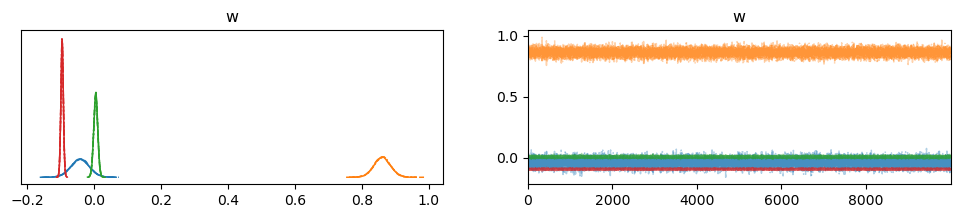

In [6]:
# Plot the posterior predictive distribution
# First plot: distributions of w3, w0, w2, w1 respectively
# Second plot: we can read the variance of each w; variance od w0 and w1 is greater than w2, w3
# Each line correponds to one chain in parallel computing, in our case - we have 4 chains
pm.plot_trace(trace, var_names=['w'])
plt.show()

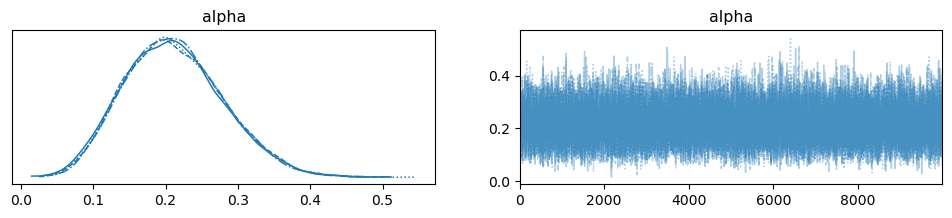

In [7]:
pm.plot_trace(trace, var_names=['alpha'])
plt.show()

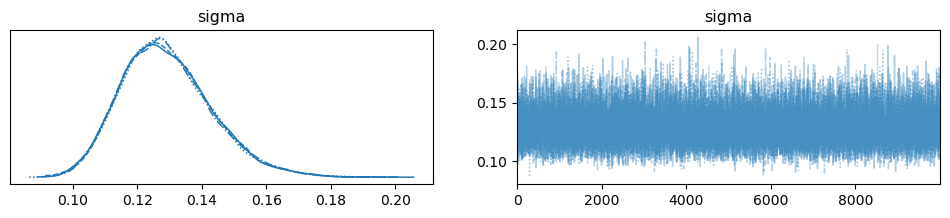

In [8]:
pm.plot_trace(trace, var_names=['sigma'])
plt.show()

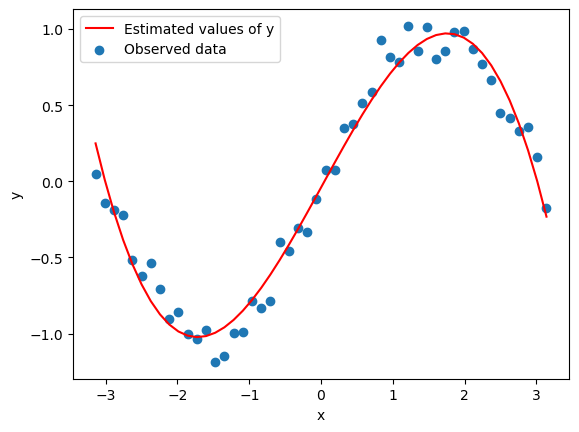

In [9]:
w0 = az.summary(trace, kind="stats")["mean"][0] # średnia z 40 000 wywołań (po 10 000 dla każdego łańcucha)
w1 = az.summary(trace, kind="stats")["mean"][1]
w2 = az.summary(trace, kind="stats")["mean"][2]
w3 = az.summary(trace, kind="stats")["mean"][3]

ys_ = w0 + w1*xs + w2*xs**2 + w3*xs**3

plt.plot(xs, ys_, color='red', label="Estimated values of y")
plt.scatter(xs, ys, marker='o', label='Observed data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

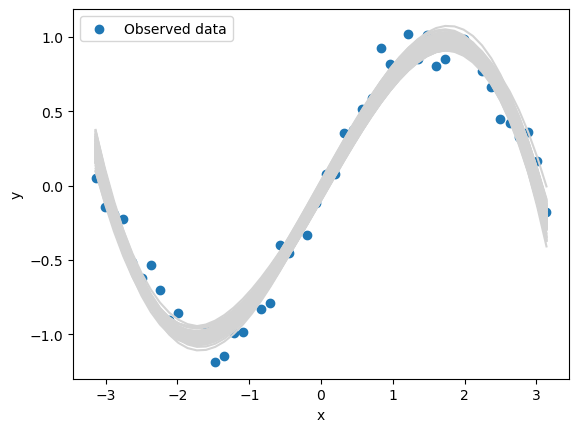

In [10]:
# Extract and plot 100 random individual posterior samples of w
w_samples = trace.posterior['w']

for i in range(100):
    w  = w_samples[np.random.randint(0, len(w_samples))] # choosing random chain
    w = w[np.random.randint(0, len(w))]                  # choosing random sample from the chain
    y = np.array([w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3 for x in xs])
    plt.plot(xs, y, color='lightgrey')

plt.scatter(xs, ys, marker='o', label='Observed data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
# Compute estimates for new values of y's based on posterior samples of w
w_hat = np.array(trace.posterior['w']).reshape(40000, 4)

def compute_mu(w, x):
    return w[:,0] + w[:,1] * x + w[:,2] * x**2 + w[:,3] * x**3

ys_hat = np.array([compute_mu(w_hat, x) for x in xs])

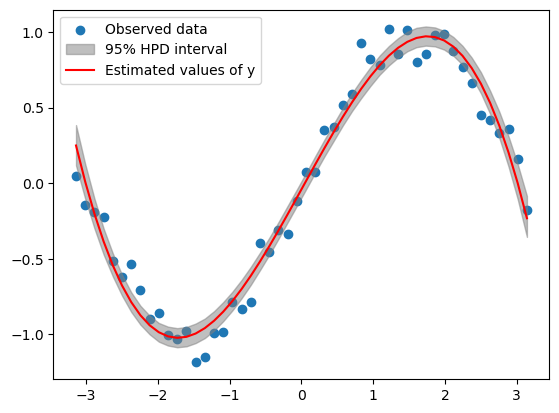

In [12]:
# Calculate HPD credible interval of 95%
ci_95 = az.hdi(np.transpose(ys_hat), hdi_prob=0.95)

lower_ys = ci_95[:,0]
upper_ys = ci_95[:,1]
plt.scatter(xs, ys, marker='o', label='Observed data')
plt.fill_between(xs, lower_ys, upper_ys, color='grey', alpha=0.5, label='95% HPD interval')
plt.plot(xs, ys_, color='red', label="Estimated values of y")
plt.legend()
plt.show()

# <center> Prosta sieć Bayesowska - Paradoks Monty’ego Halla </center>

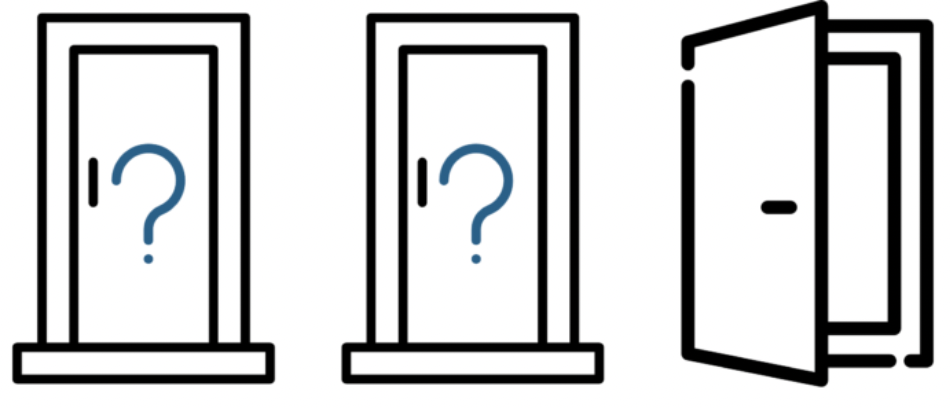

- Mamy 3 drzwi. Za jednymi jest nagroda, za pozostałymi dwoma nic.
- Nie wiemy gdzie jest nagroda. Wybieramy jedne z drzwi: numer 1, 2, lub 3.
- Prowadzący wie, za którymi drzwiami jest nagroda. Po otwarciu wybranych przez nas drzwi prowadzący otwiera kolejne (tym razem wybrane przez siebie drzwi), za którymi nie ma nagrody.
- Prowadzący pyta nas czy chcemy otworzyć wybrane przez nas na początku drzwi czy chcemy zmienić nasz wybór.

Można zbudować prostą sieć Bayesowską do zbudowania modelu obliczającego prawdopodobieństwo wygranej, jeśli uczestnik zdecyduje się zmienić swoją decyzję co do wyboru drzwi.

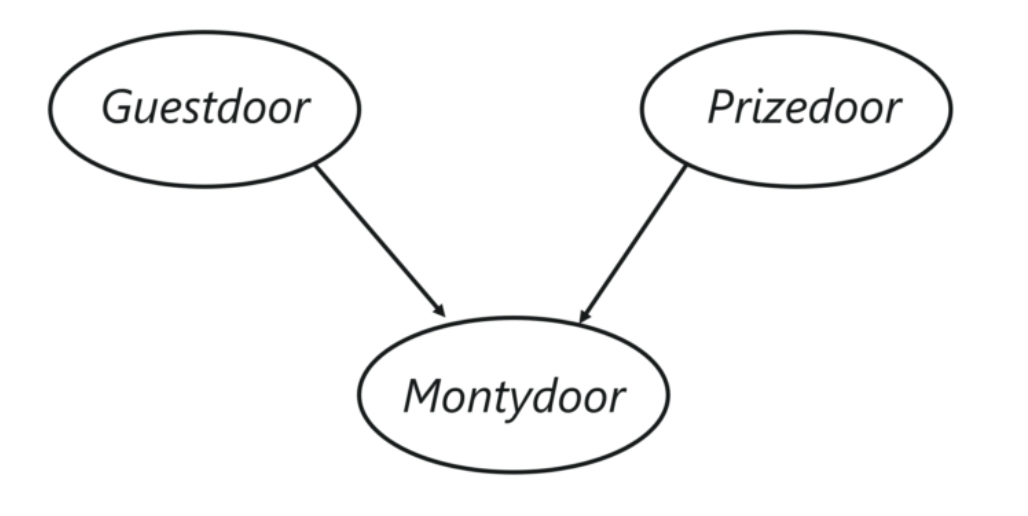

Graf pokazuje, że jedynie wybór drzwi przez prowadzącego zależy od naszego wyboru oraz faktu gdzie jest nagroda.

In [2]:
#Import required packages
import math
from pomegranate import *
 
# Initially the door selected by the guest is completely random
guest =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 
# The door containing the prize is also a random process
prize =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 
# conditional probability
# doors picked by the guest, prize door and the door picked by host
# The door Monty picks, depends on the choice of the guest and the prize door
monty =ConditionalProbabilityTable(
[[ 'A', 'A', 'A', 0.0 ],
[ 'A', 'A', 'B', 0.5 ],
[ 'A', 'A', 'C', 0.5 ],
[ 'A', 'B', 'A', 0.0 ],
[ 'A', 'B', 'B', 0.0 ],
[ 'A', 'B', 'C', 1.0 ],
[ 'A', 'C', 'A', 0.0 ],
[ 'A', 'C', 'B', 1.0 ],
[ 'A', 'C', 'C', 0.0 ],
[ 'B', 'A', 'A', 0.0 ],
[ 'B', 'A', 'B', 0.0 ],
[ 'B', 'A', 'C', 1.0 ],
[ 'B', 'B', 'A', 0.5 ],
[ 'B', 'B', 'B', 0.0 ],
[ 'B', 'B', 'C', 0.5 ],
[ 'B', 'C', 'A', 1.0 ],
[ 'B', 'C', 'B', 0.0 ],
[ 'B', 'C', 'C', 0.0 ],
[ 'C', 'A', 'A', 0.0 ],
[ 'C', 'A', 'B', 1.0 ],
[ 'C', 'A', 'C', 0.0 ],
[ 'C', 'B', 'A', 1.0 ],
[ 'C', 'B', 'B', 0.0 ],
[ 'C', 'B', 'C', 0.0 ],
[ 'C', 'C', 'A', 0.5 ],
[ 'C', 'C', 'B', 0.5 ],
[ 'C', 'C', 'C', 0.0 ]], [guest, prize] )
 
d1 = State( guest, name="guest" )
d2 = State( prize, name="prize" )
d3 = State( monty, name="monty" )
 
#Building the Bayesian Network
network = BayesianNetwork( "Solving the Monty Hall Problem With Bayesian Networks" )
network.add_states(d1, d2, d3)
network.add_edge(d1, d3)
network.add_edge(d2, d3)
network.bake()

In [3]:
# predykcje - gdy wybieramy drzwi A
beliefs = network.predict_proba({ 'guest' : 'A' })
beliefs = map(str, beliefs)
print("n".join( "{}t{}".format(state.name, belief) for state, belief in zip(network.states, beliefs)))
# prawdopodobieństwo, że w drzwiach i jest nagroda
# prawdopodobieństwo, że prowadzący wybierze drzwi i

guesttAnprizet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333333,
            "B" : 0.3333333333333333,
            "C" : 0.3333333333333333
        }
    ],
    "frozen" : false
}nmontyt{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "B" : 0.49999999999999983,
            "A" : 0.0,
            "C" : 0.49999999999999983
        }
    ],
    "frozen" : false
}


In [4]:
# predykcje - gdy wybieramy drzwi A, prowadzący wybiera drzwi B
beliefs = network.predict_proba({'guest' : 'A', 'monty' : 'B'})
print("n".join( "{}t{}".format( state.name, str(belief) ) for state, belief in zip( network.states, beliefs )))
# prawdopodobieństwo, że w drzwiach i jest nagroda

guesttAnprizet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333334,
            "B" : 0.0,
            "C" : 0.6666666666666664
        }
    ],
    "frozen" : false
}nmontytB


# <center> Biblioteki Python </center>
- PyMC3 - sieci Bayesowskie, 
- pystan - interface Stan'a (probabilistyczny język programowania do wnioskowania statystycznego) dla pythona,
- NiLearn - zbudowana na scikit-learn-ie,
- pgmpy,
- ...

# <center> Więcej info </center>
-  Christopher M. Bishop, Pattern Recognition and Machine Learning, Springer 2006
- https://www.cs.ubc.ca/~murphyk/Bayes/bnintro.html